In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Exploratory Data Analysis

In [193]:
file ='house-prices.csv'
df = pd.read_csv(file)
df.drop(['Order', 'PID'], axis=1, inplace=True)

In [194]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,20,RL,75.00,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,160,RM,21.00,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,20,RL,70.00,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,190,RM,60.00,10120,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [195]:
df.shape

(2430, 80)

__Observation__:
- There are 80 features and 2430 entries
- We observe there's a mix of categorical and numerical features

Data types of the different columns in the dataset:

In [196]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [197]:
continuous_columns = df.dtypes[df.dtypes == 'float64'].index
continuous_columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [198]:
discrete_columns = df.dtypes[df.dtypes == 'int64'].index
discrete_columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [199]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index
categorical_columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

__Observation__:
- Comparing the data types with the documentation about the dataset we observe the following mismatches:
- Variables that should be categorical: __'MS SubClass'__;
- Variables that should be continuous : __'Lot Area', '1st Flr SF', '2nd Flr SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch','3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val'and 'SalePrice'__;
- Variables that should be discrete   : __'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars'__;
- Observing the values of the variables that should be discrete we see that see take only integer values as expected;
  
__Solution__:
- We convert the datatypes of all the above variables to the correct ones;
- For the discrete variables (`int64`) we first convert all the variables to `Int64`, since only this integer datatype supports `NA` values;

In [200]:
# Convert to Categorical
df['MS SubClass'] = df['MS SubClass'].astype(str)

# Convert to Discrete (but first convert all int64 to Int64 )
for col in discrete_columns:
        df[col] = df[col].astype('Int64')

# Convert to Continuous
convert_to_continuous = ['Lot Area', '1st Flr SF', '2nd Flr SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch','3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
for col in convert_to_continuous:
        df[col] = df[col].astype('float64')


convert_to_discrete = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars']
for col in convert_to_discrete:
        df[col] = df[col].astype('Int64')


We obtain again the list of datatypes after the conversions:

In [201]:
continuous_columns = df.dtypes[df.dtypes == 'float64'].index
discrete_columns = df.dtypes[df.dtypes == 'Int64'].index
categorical_columns = df.dtypes[df.dtypes == 'object'].index

Next we'll perform the data cleaning operations (Incorrect and missing values, inconsistencies, and outliers) for each datatype separately.

## Categorical Features

In [202]:
print(f'Number of categorical features: {len(categorical_columns)}')

Number of categorical features: 43


### Missing values:

In [203]:
print(f'Total missing values: {df[categorical_columns].isna().sum().sum()}')

Total missing values: 12524


In [204]:
df_categorical_missing = df[categorical_columns].isna().sum().to_frame(name='total')
df_categorical_missing = df_categorical_missing[df_categorical_missing['total']!=0].sort_values('total', ascending=False)
df_categorical_missing['percentage'] = df_categorical_missing['total']/len(df)*100
df_categorical_missing

,total,percentage
Pool QC,2418,99.51
Misc Feature,2340,96.30
Alley,2267,93.29
Fence,1941,79.88
Mas Vnr Type,1462,60.16
Fireplace Qu,1186,48.81
Garage Finish,138,5.68
Garage Qual,138,5.68
Garage Cond,138,5.68
Garage Type,136,5.60


__Observation__:
- Some of the categorical features present a very high percentage of missing values

__Solution__:
- Discard all features with missing values >75%
- Obtain again the list of categorical features after the column removal

In [205]:
df.drop(df_categorical_missing[df_categorical_missing['percentage']>75].index, axis=1)
categorical_columns = df.dtypes[df.dtypes == 'object'].index

__Observation__:
- For many of the categorical ordinal features the label 'NA' (indicating that a given feature is not present in the property, e.g. a basement) was converted to a missing value in dataframe.


__Solution__:
- Replace the missing `np.nan` values of all these features (except 'Electrical') with the string 'NA'

In [206]:
categorical_missing = ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']
df[categorical_missing] = df[categorical_missing].fillna('NA')

In [207]:
df[df['Electrical'].isna()]


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
694,80,RL,73.00,9735.00,Pave,NA,Reg,Lvl,AllPub,Inside,...,0.00,NA,NA,NA,0.00,5,2008,WD,Normal,167500.00


__Observation__:
- The only categorical feature with remaining missing values is the 'Electrical' feature, with a single entry

__Solution__:
- Remove this entry

In [208]:
df.drop(df[df['Electrical'].isna()].index, inplace=True)

## Numerical discrete columns

In [209]:
print('Number of numerical discrete features:', len(discrete_columns))

Number of numerical discrete features: 17


### Missing Values:

In [210]:
print(f'Total missing values: {df[discrete_columns].isna().sum().sum()}')

Total missing values: 143


In [211]:
df_discrete_missing = df[discrete_columns].isna().sum().to_frame(name='total')
df_discrete_missing = df_discrete_missing[df_discrete_missing['total']!=0].sort_values('total', ascending=False)
df_discrete_missing['percentage'] = df_discrete_missing['total']/len(df)*100
df_discrete_missing

,total,percentage
Garage Yr Blt,138,5.68
Bsmt Full Bath,2,0.08
Bsmt Half Bath,2,0.08
Garage Cars,1,0.04


__Observation__:
- 'Garage Yr Blt' is the feature with more missing values, these correspond to entries where there is no garage.
- Other features represent very small number of missing values and will be handled in Section - Inconcistencies  

__Solution__: 
- For 'Garage Yr Blt': 
    - check if the missing values correpond mostly to propreties where a garage is not present;
    - if yes, it's not obvious which value to give to 'Garage Yr Blt' these cases...
    - check correlation between 'Year Blt' and 'Garage Yr Blt'
    - if correlation is high we decide to drop the 'Garage Yr Blt feature'

In [212]:
df[df['Garage Yr Blt'].isna()]['Garage Type'].value_counts()

Garage Type
NA        136
Detchd      2
Name: count, dtype: int64

In [213]:
df['Garage Yr Blt'].corr(df['Year Built'])

0.8354174366616421

As explained before, we decide to drop the feature 'Garage Yr Blt'

In [214]:
df.drop('Garage Yr Blt', axis=1, inplace=True)

## Numerical continuous variable

In [215]:
print('Number of numerical continuous features:', len(continuous_columns))

Number of numerical continuous features: 20


### Missing Values:

In [216]:
print(f'Total missing values: {df[continuous_columns].isna().sum().sum()}')

Total missing values: 445


In [217]:
df_continuous_missing = df[continuous_columns].isna().sum().to_frame(name='total')
df_continuous_missing = df_continuous_missing[df_continuous_missing['total']!=0].sort_values('total', ascending=False)
df_continuous_missing['percentage'] = df_continuous_missing['total']/len(df)*100
df_continuous_missing

,total,percentage
Lot Frontage,420,17.29
Mas Vnr Area,20,0.82
BsmtFin SF 1,1,0.04
BsmtFin SF 2,1,0.04
Bsmt Unf SF,1,0.04
Total Bsmt SF,1,0.04
Garage Area,1,0.04


__Observation__:
- Feature 'Lot Frontage' has a significant ammount of missing values, these could be from properties with no street connection, but this should be verified
- 'Mas Vnr Area' (Masonry veneer area in square feet) with missing values could also be coming from properties with no Masonry veneer surface

__Solution__:
- Observe relation between 'Lot Frontage' and 'Lot Config' for properties with no lot frontage.
- Check if missing values in 'Mas Vnr Area', also have 'Mas Vnr Type' equal to 'NA'
- If previous 

Missing values in 'Lot Frontage':

In [218]:
df[df['Lot Frontage'].isna()]['Lot Config'].value_counts()

Lot Config
Inside     235
Corner      86
CulDSac     79
FR2         17
FR3          3
Name: count, dtype: int64

Most missing values in 'Lot Frontage' correspond to lot configurations where it's more likely that there's no connection to street. Hence it seemes reasonable that these missing values should correpond to 0 feet of street connection of the property.

In [219]:
df['Lot Frontage'].fillna(0, inplace=True)

Missing values in 'Mas Vnr Area':

In [220]:
df[df['Mas Vnr Area'].isna()]['Mas Vnr Type'].value_counts()

Mas Vnr Type
NA    20
Name: count, dtype: int64

All missing values in 'Mas Vnr Area' correspond to entries where 'Mas Vnr Type' is 'NA', hence it makes sense that these values should actually be zero.

In [221]:
df['Mas Vnr Area'].fillna(0, inplace=True)

Next we look at the other missing values in some Basement related features. Below we see that the 3 missing values correspond to a single entry, and we decide to drop this entry.

In [222]:
df[df['BsmtFin SF 1'].isna() | df['BsmtFin SF 2'].isna() | df['Bsmt Unf SF'].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
104,20,RM,99.00,5940.00,Pave,NA,IR1,Lvl,AllPub,FR3,...,0.00,NA,MnPrv,NA,0.00,4,2008,ConLD,Abnorml,79000.00


In [223]:
df.drop([104], inplace=True)

After the previous cleanup, the follwoing reduced number of features with missing values remain:

In [224]:
df_missing = df.isna().sum().to_frame(name='total')
df_missing = df_missing[df_missing['total']!=0].sort_values('total', ascending=False)
df_missing['percentage'] = df_missing['total']/len(df)*100
df_missing.head()

,total,percentage
Bsmt Full Bath,1,0.04
Bsmt Half Bath,1,0.04
Garage Cars,1,0.04
Garage Area,1,0.04


# Inconsistencies

Next we'll analyse possible incosistencies among the following related variables:

- Basement variables
- Garage Year Built
- Finished vs living areas
- 'Year Built' vs 'Year Remod/Add'

### Basement variables

Next we check for possible inconsistencies in Basement related features with missing values

In [225]:
basement_columns = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

We start by looking at entries where at least one feature indicates 'NA', but where this is inconsistent witht he other features.

In [226]:
q1 = '(`Bsmt Qual` == "NA") | (`Bsmt Exposure` == "NA") | (`BsmtFin Type 1` == "NA") | (`BsmtFin Type 2` == "NA")'
q2 = '~((`Bsmt Qual` == "NA") & (`Bsmt Exposure` == "NA") & (`BsmtFin Type 1` == "NA") & (`BsmtFin Type 2` == "NA") & (`BsmtFin SF 1` == 0.00) & (`BsmtFin SF 2` == 0.00) & (`Bsmt Unf SF` == 0.00) & (`Total Bsmt SF` == 0.00) & (`Bsmt Full Bath` == 0) & (`Bsmt Half Bath` == 0))'
df.query(q1).query(q2)[basement_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
602,Gd,TA,No,GLQ,1124.00,NA,479.00,1603.00,3206.00,1,0
875,Gd,TA,NA,Unf,0.00,Unf,0.00,1595.00,1595.00,0,0
1681,Gd,TA,NA,Unf,0.00,Unf,0.00,725.00,725.00,0,0
1726,Gd,TA,NA,Unf,0.00,Unf,0.00,936.00,936.00,0,0


__Observation__:
- The previous entries show some kind of inconsistency, among the variables describing the basement facilities

__Solution__:
- Since these are only a few entries, we'll fix the entries using common sense
- We'll populate the column `'Bsmt Exposure'` of entries 875, 1681 and 1726, where  indicates there is no basement but we there's a basement in Unfinished conditions, with `'Bsmt Exposure'=='No'` that indicates no exposure to outside

In [227]:
df.loc[104, ['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']] = 0
df.loc[602, ['BsmtFin Type 2']] = 'Unf'
df.loc[[875,1681, 1726], ['Bsmt Exposure']] = 'No'

Next we check for potential inconsistencies among the various surface features.

In [228]:
inconsistent_basement_surface = (df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Bsmt Unf SF']) != df['Total Bsmt SF']
inconsistent_basement_surface.sum()

0

__Observation__:
- The Basement surface features are consistent among for all entries

### Garage Variables

In [229]:
garage_columns = ['Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']

Again, we start by looking at entries where at least one feature indicates 'NA', but where this is inconsistent witht he other features.

In [230]:
q1 = '(`Garage Type` == "NA") | (`Garage Finish` == "NA") | (`Garage Cars` == 0) | (`Garage Area` == 0) | (`Garage Qual` == "NA") & (`Garage Cond` == "NA")'
q2 = '~((`Garage Type` == "NA") & (`Garage Finish` == "NA") & (`Garage Cars` == 0) & (`Garage Area` == 0) & (`Garage Qual` == "NA") & (`Garage Cond` == "NA"))'
df.query(q1).query(q2)[garage_columns]

,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1114,Detchd,NA,1,360.00,NA,NA
1565,Detchd,NA,<NA>,NaN,NA,NA


__Observation__:
- There are two entries with inconsistent values

__Solution__:
- We decide to drop these since they are just two

In [231]:
df.drop([1114, 1565], inplace=True)

## Year Built vs Year Remod/Add vs Year Sold 

Ws must have 'Yr Sold' >= 'Year Remod/Add' >= 'Year Built' 

In [232]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage

In [233]:
q = '(`Year Built` > `Year Remod/Add`)'
df.query(q)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [234]:
q = '(`Year Built` > `Yr Sold`)'
df.query(q)[['Year Built', 'Year Remod/Add', 'Yr Sold']]

,Year Built,Year Remod/Add,Yr Sold
71,2008,2009,2007


__Observation__:  
- No inconsistencies observed between 'Year Built' and 'Year Remod/Add'
- For entrie 71 the 'Yr Sold' should be at least 2009

__Solution__:  
- Manually change this values

In [235]:
# Change value of Yr SOld for entry 71 to 2009
df.loc[71,'Yr Sold'] = 2009

## Misc Feature and Misc Val

In [239]:
q = '(`Misc Feature` ==  "NA") & (`Misc Val` != 0)'
df.query(q)[['Misc Feature', 'Misc Val']]

,Misc Feature,Misc Val


__Observations__:  
- No inconsistencies observed

# Feature distribution:

## Categorical Features

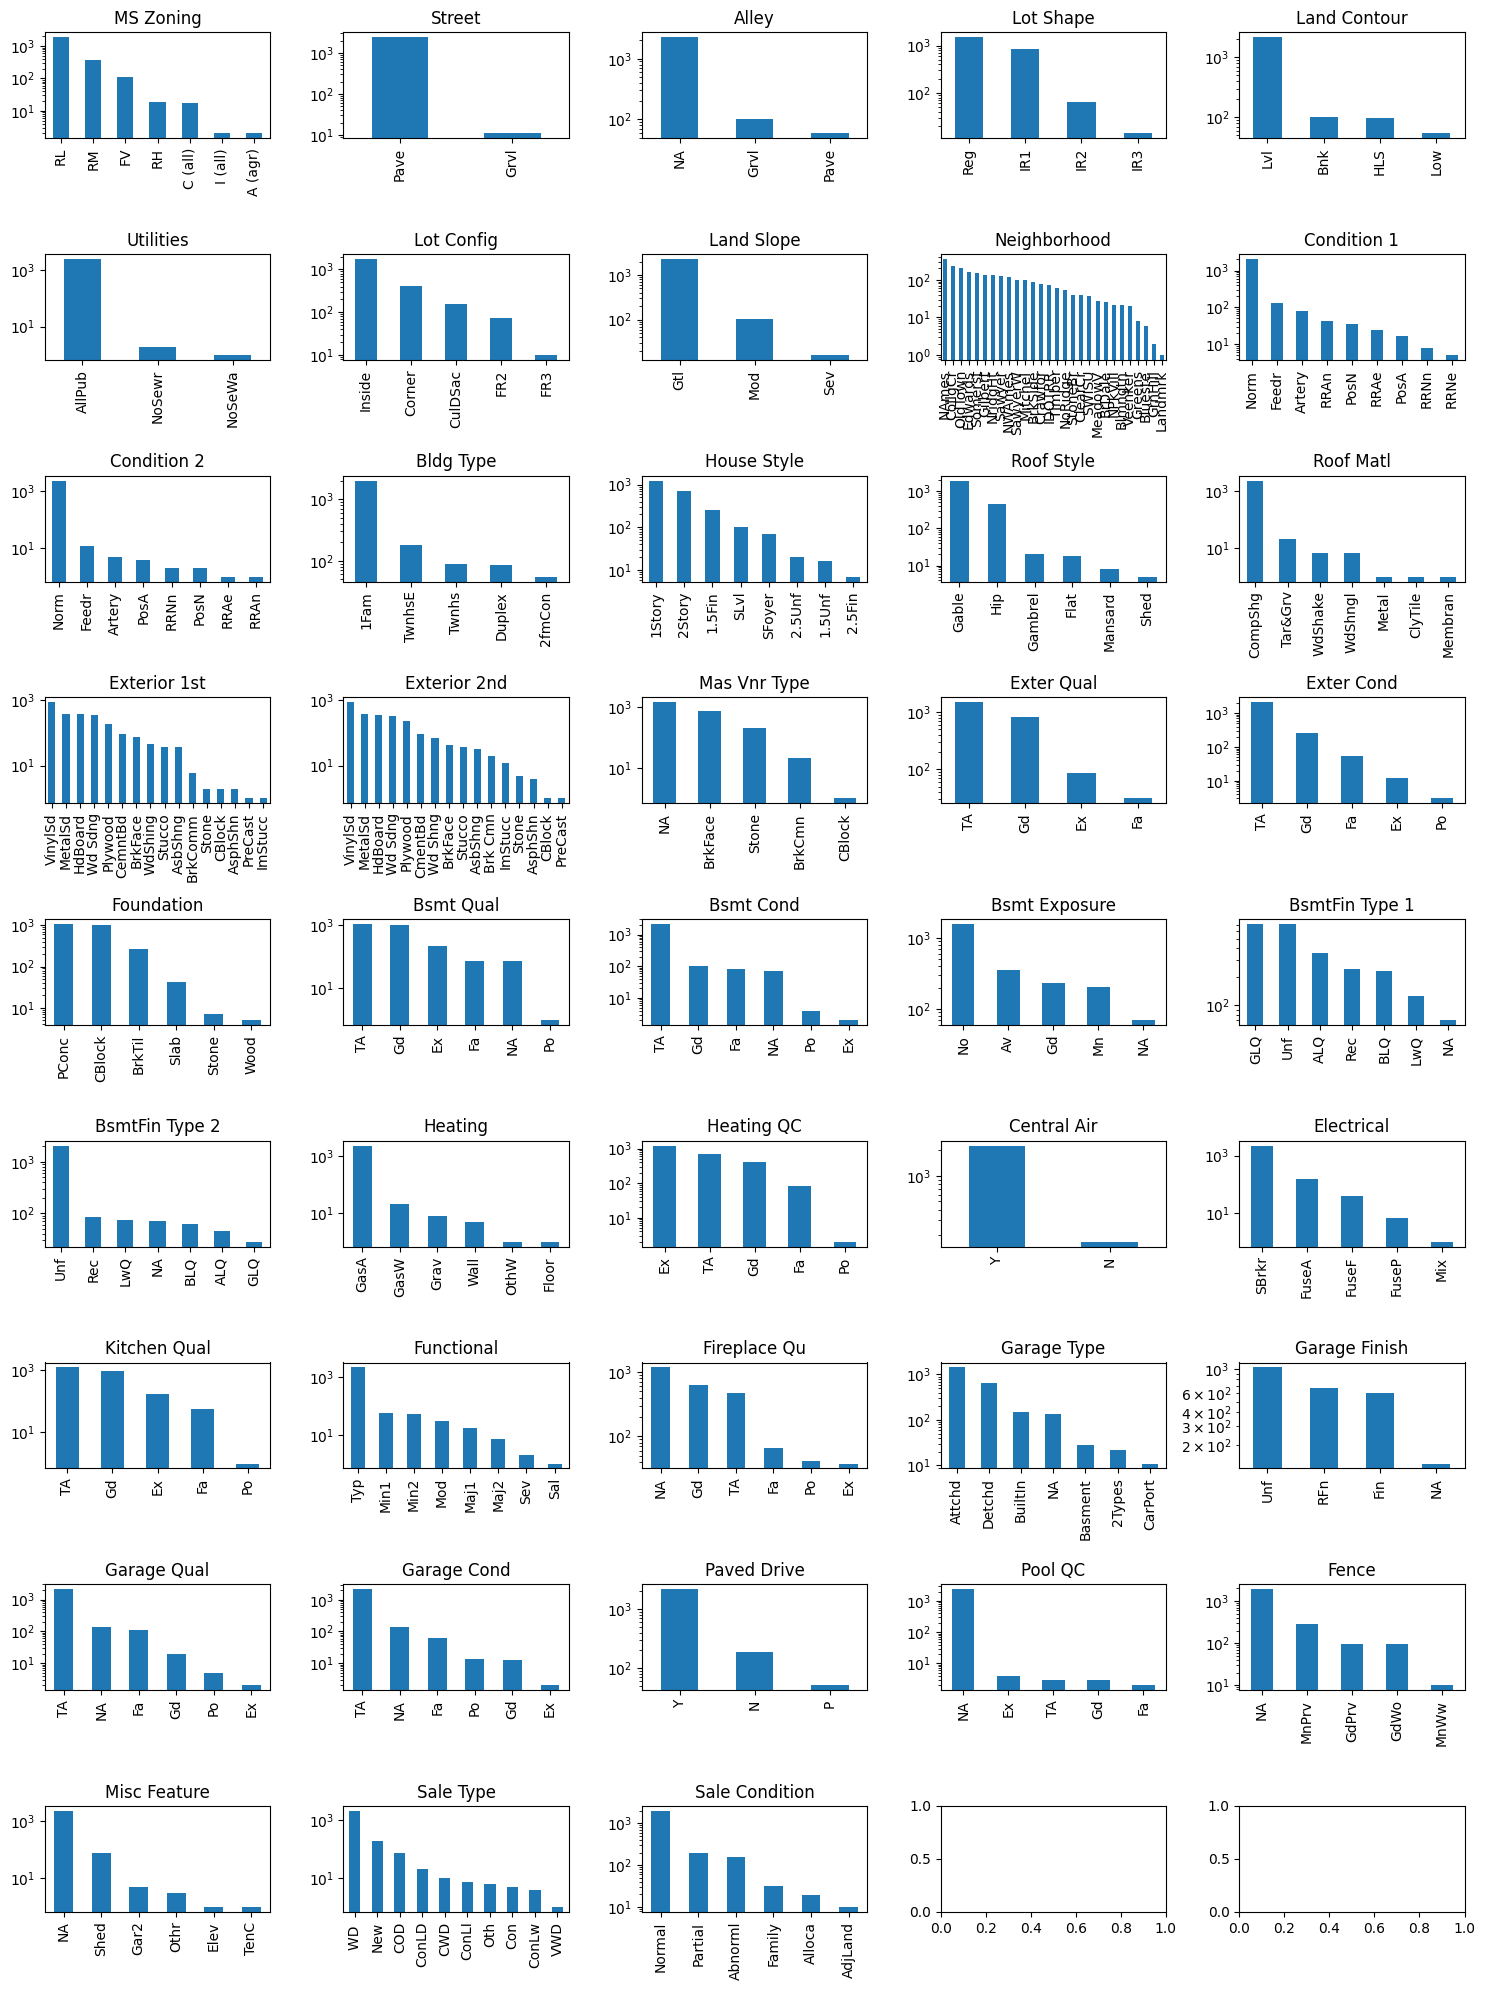

In [237]:
n_cols = 5
n_rows = 9

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for i, col in enumerate(categorical_columns):
    r, c = np.divmod(i, n_cols)
    df[col].value_counts().plot(kind='bar', ax=axs[r, c], logy=True)
    axs[r, c].set_title(col, y=1.0)
    axs[r, c].set_xlabel('')

plt.tight_layout()
plt.show()

## Numerical Discrete Features

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/indexes/base.py:3790 in get_loc                                                              │
│                                                                                                  │
│   3787 │   │   """                                                                               │
│   3788 │   │   casted_key = self._maybe_cast_indexer(key)                                        │
│   3789 │   │   try:                                                                              │
│ ❱ 3790 │   │   │   return self._engine.get_loc(casted_key)                                       │
│   3791 │   │   except KeyError as err:                                                           │
│   3792 │   │   │   if isinstance(casted_key, slice) or (                                         │
│   3793 │   │   │   │   isinstance(casted_key, abc.Iterable)                                      │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:152                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:181                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7080                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7088                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Garage Yr Blt'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│    5                                                                                             │
│    6 for i, col in enumerate(discrete_columns):                                                  │
│    7 │   r, c = np.divmod(i, n_cols)                                                             │
│ ❱  8 │   df[col].hist(bins=50, ax=axs[r, c], log=True)                                           │
│    9 │   axs[r, c].set_title(col, y=1.0)                                                         │
│   10 │   axs[r, c].set_xlabel('')                                                                │
│   11                                                                                             │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/frame.py:3893 in __getitem__                                                                 │
│                                                                                                  │
│    3890 │   │   if is_single_key:                                                                │
│    3891 │   │   │   if self.columns.nlevels > 1:                                                 │
│    3892 │   │   │   │   return self._getitem_multilevel(key)                                     │
│ ❱  3893 │   │   │   indexer = self.columns.get_loc(key)                                          │
│    3894 │   │   │   if is_integer(indexer):                    

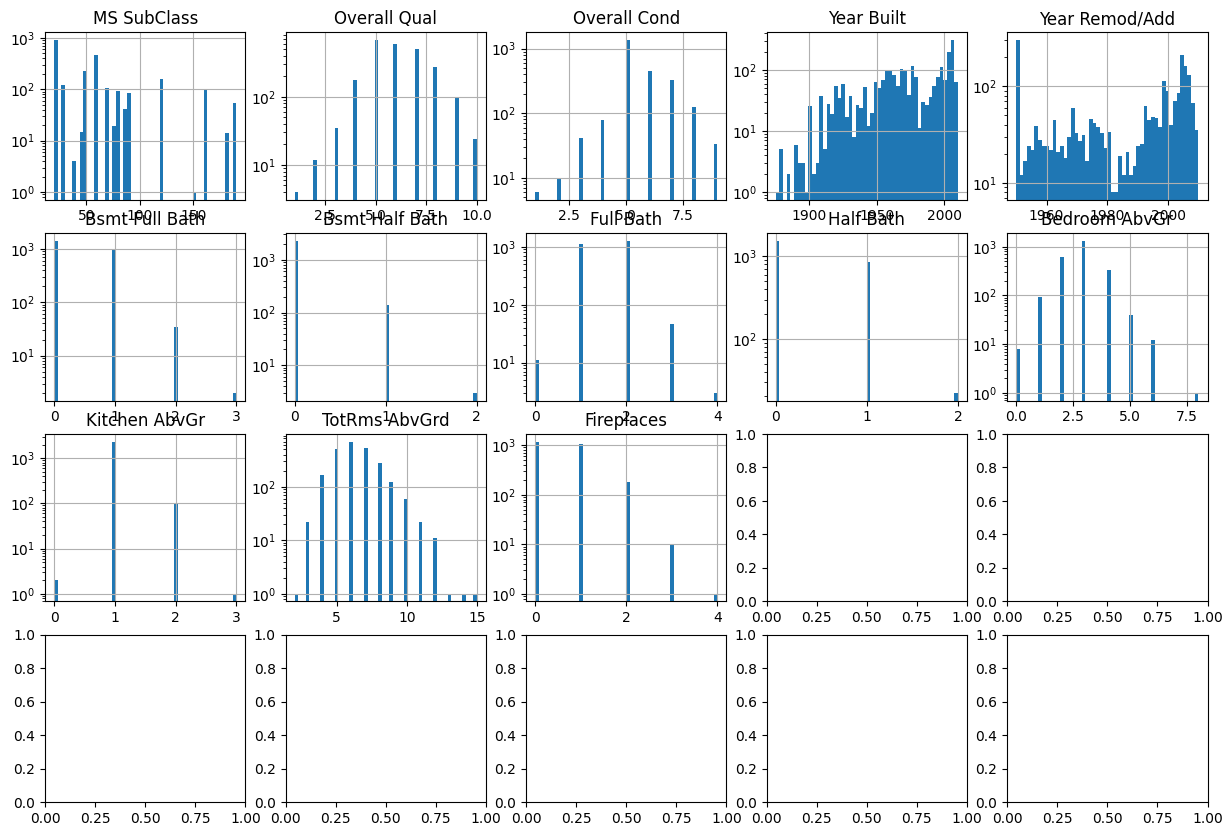

In [238]:
n_cols = 5
n_rows = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, col in enumerate(discrete_columns):
    r, c = np.divmod(i, n_cols)
    df[col].hist(bins=50, ax=axs[r, c], log=True)
    axs[r, c].set_title(col, y=1.0)
    axs[r, c].set_xlabel('')

plt.tight_layout()
plt.show()

## Numerical Continuous Features

In [ ]:
n_cols = 5
n_rows = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, col in enumerate(continuous_columns):
    r, c = np.divmod(i, n_cols)
    df[col].hist(bins=50, ax=axs[r, c], log=True)
    axs[r, c].set_title(col, y=1.0)
    axs[r, c].set_xlabel('')

plt.tight_layout()
plt.show()

# Relationship with target variable

## Categorical Features

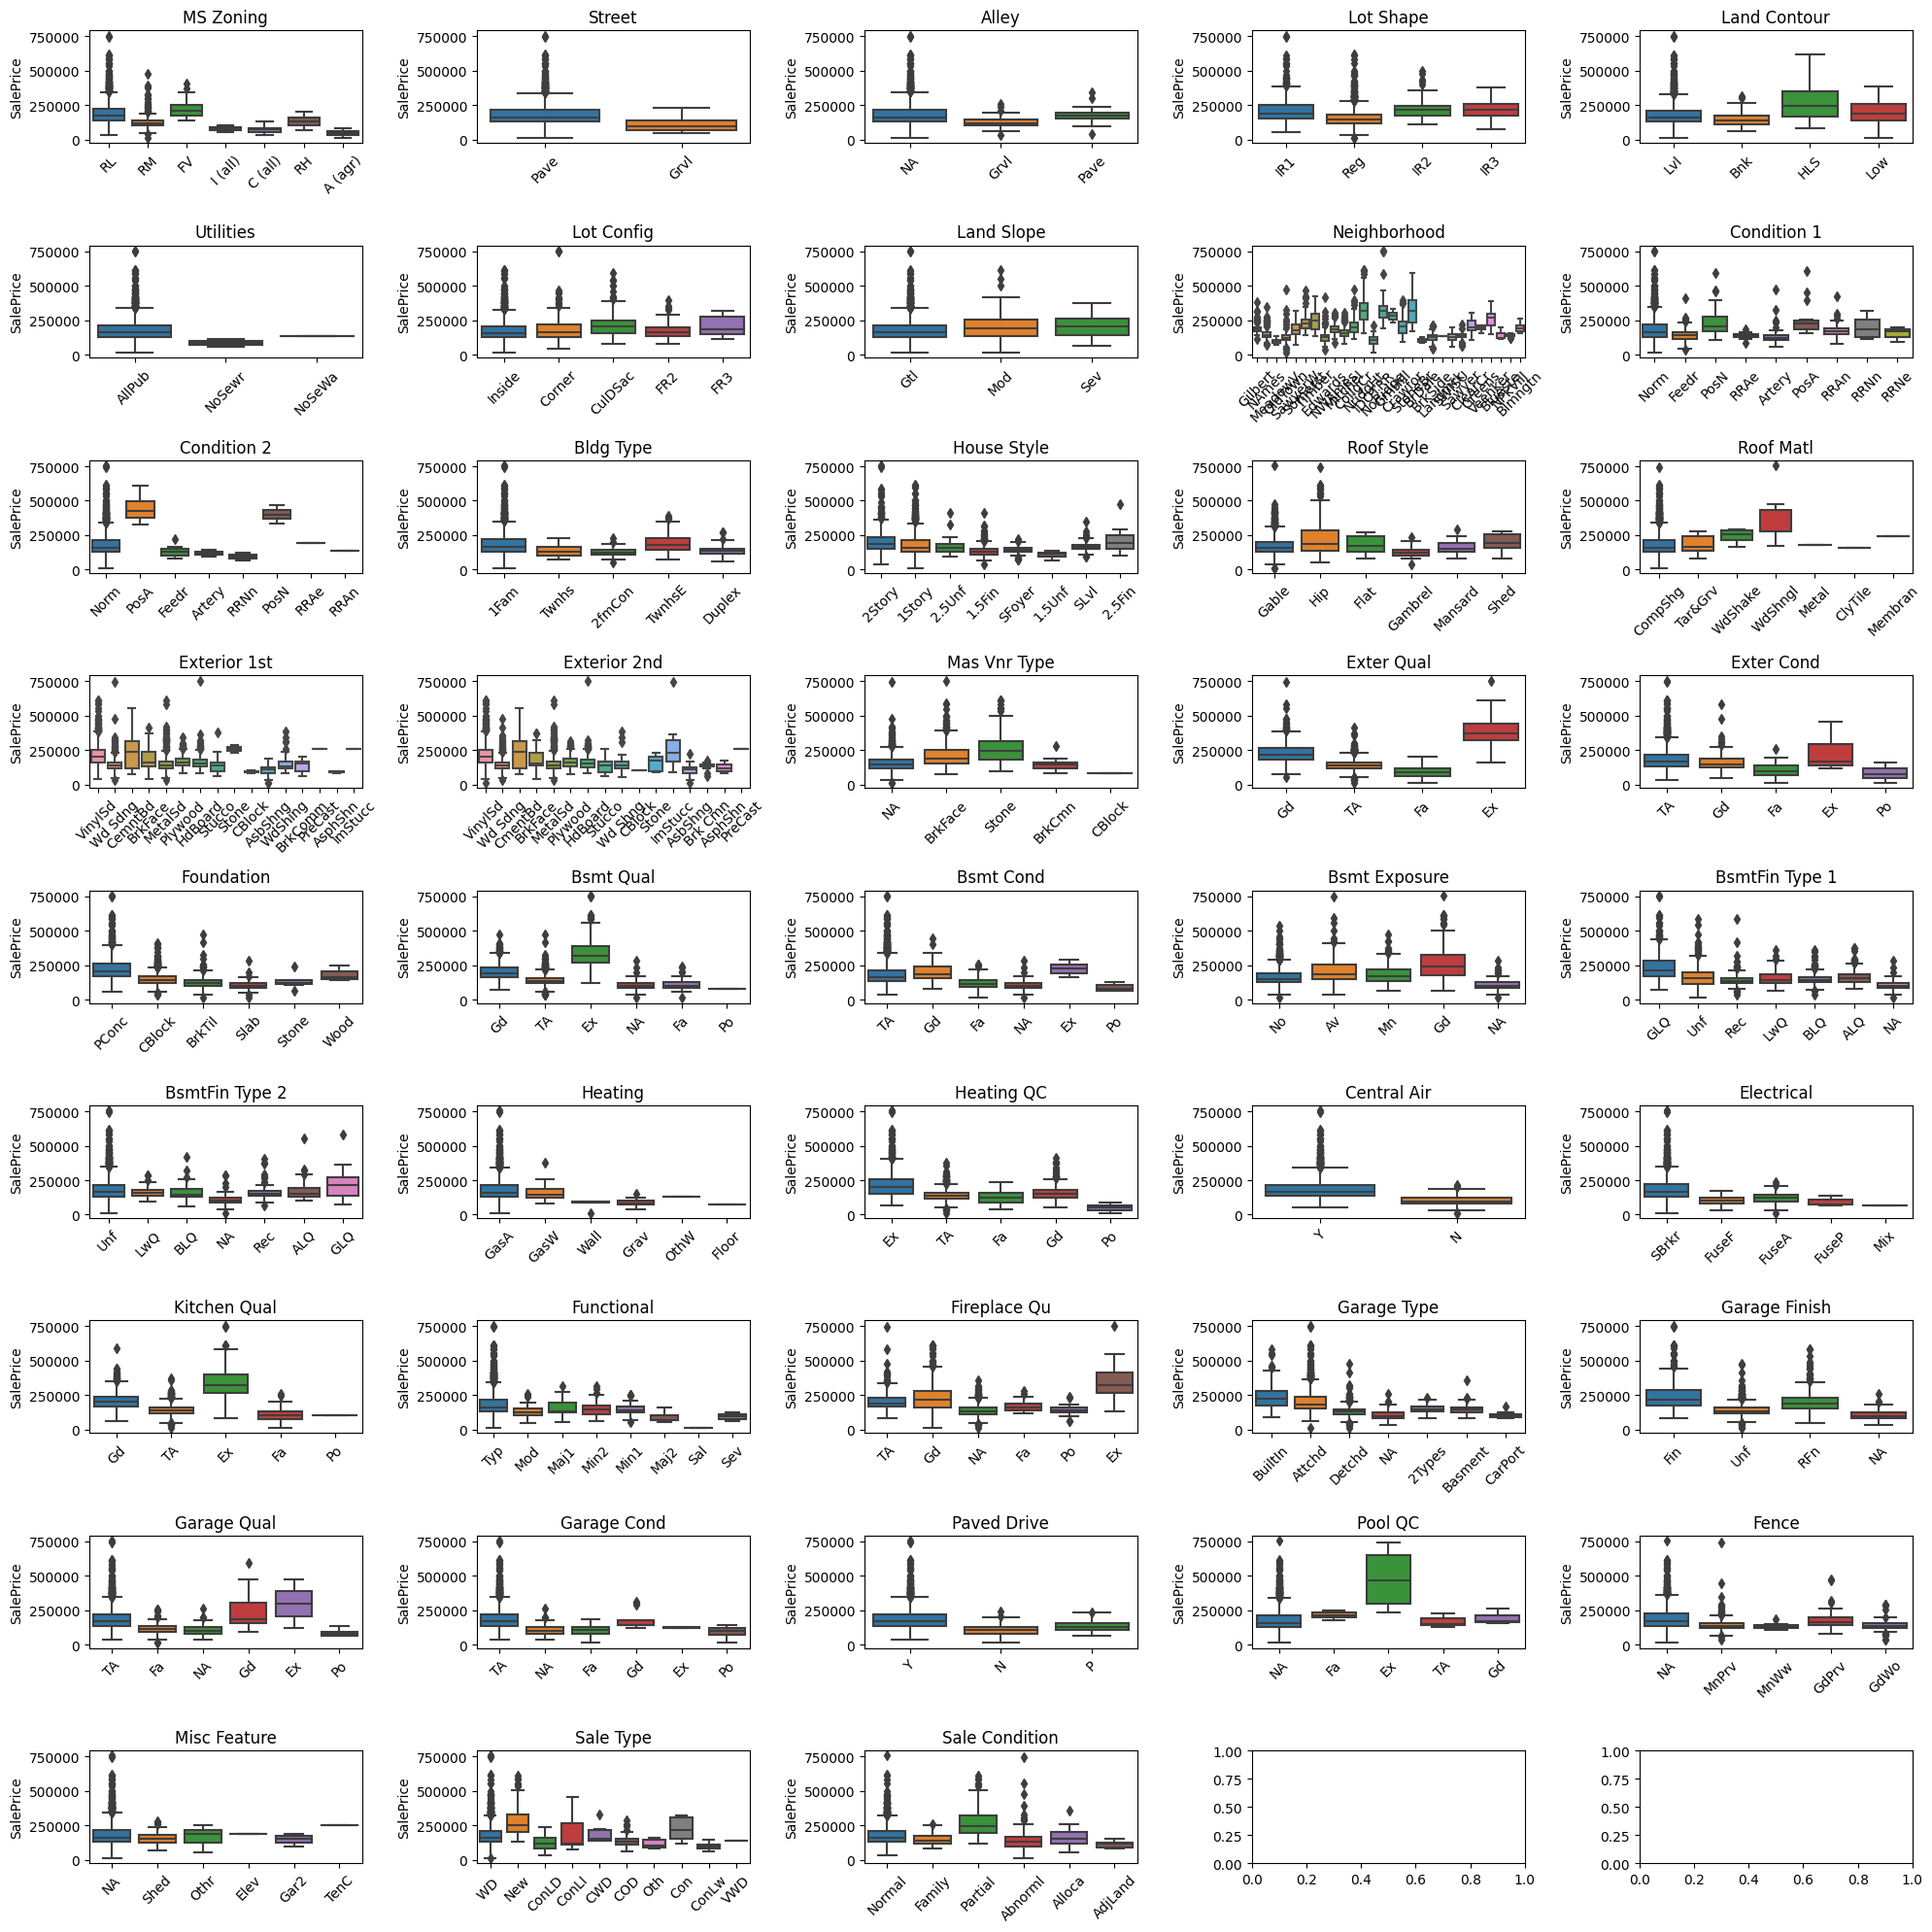

In [52]:
n_cols = 5
n_rows = 9

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, col in enumerate(categorical_columns):
    r, c = np.divmod(i, n_cols)
    sns.boxplot(x=col, y='SalePrice', data=df, ax=axs[r, c])
    #axs[r, c].set_yscale('log')
    axs[r, c].set_title(col, y=1.0)
    axs[r, c].set_xlabel('')
    for label in axs[r, c].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

__Observations__:
- There's a big diversity on how the categorical features relate to the 'Sale Price'
- For a few features there's a big effect, depending on the labels and specially for predicting high values of 'Sale Price', e.g. for 'neighbourhood', 'Condition 2', 'Pool Qc'
- For many of the ordinal features there seems to be trend that could be well adjusted by a linear relationship if the labels were ordered differently
- Other features show almost no correlation, e.g. 'Slope', 'Lot Config', 'Lot Shape'
- Additionally, others seem to show no effect with respect with most of the labels in the feature except for 1 or 2, e.g. 'Pool QC'  

In [ ]:
correlations = df[continuous_columns.tolist()].corr()['SalePrice'].abs().sort_values(ascending=False)
print(correlations)

In [ ]:
df_categorical_missing = df[categorical_columns].isna().sum().to_frame(name='total')
df_categorical_missing = df_categorical_missing[df_categorical_missing['total']!=0].sort_values('total', ascending=False)
df_categorical_missing['percentage'] = df_categorical_missing['total']/len(df)*100
df_categorical_missing.head()

## Numerical Discrete Features

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│    5                                                                                             │
│    6 for i, col in enumerate(discrete_columns):                                                  │
│    7 │   r, c = np.divmod(i, n_cols)                                                             │
│ ❱  8 │   sns.scatterplot(x=col, y='SalePrice', data=df, ax=axs[r, c])                            │
│    9 │   #axs[r, c].set_yscale('log')                                                            │
│   10 │   axs[r, c].set_title(col, y=1.0)                                                         │
│   11 │   axs[r, c].set_xlabel('')                                                                │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/ │
│ relational.py:742 in scatterplot                                                                 │
│                                                                                                  │
│    739 ):                                                                                        │
│    740 │                                                                                         │
│    741 │   variables = _ScatterPlotter.get_semantics(locals())                                   │
│ ❱  742 │   p = _ScatterPlotter(data=data, variables=variables, legend=legend)                    │
│    743 │                                                                                         │
│    744 │   p.map_hue(palette=palette, order=hue_order, norm=hue_norm)                            │
│    745 │   p.map_size(sizes=sizes, order=size_order, norm=size_norm)                             │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/ │
│ relational.py:538 in __init__                                                                    │
│                                                                                                  │
│    535 │   │   │   np.r_[.5, 2] * np.square(mpl.rcParams["lines.markersize"])                    │
│    536 │   │   )                                                                                 │
│    537 │   │                                                                                     │
│ ❱  538 │   │   super().__init__(data=data, variables=variables)                                  │
│    539 │   │                                                                                     │
│    540 │   │   self.legend = legend                                                              │
│    541                                                                                           │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/ │
│ _oldcore.py:640 in __init__                                                                      │
│                                                                                                  │
│    637 │   │   # such information and is set up by the scale_* methods. The analogous            │
│    638 │   │   # information for numeric axes would be information about log scales.             │
│    639 │   │   self._var_ordered = {"x": False, "y": False}  # alt., used DefaultDict            │
│ ❱  640 │   │   self.assign_variables(data, variables)      

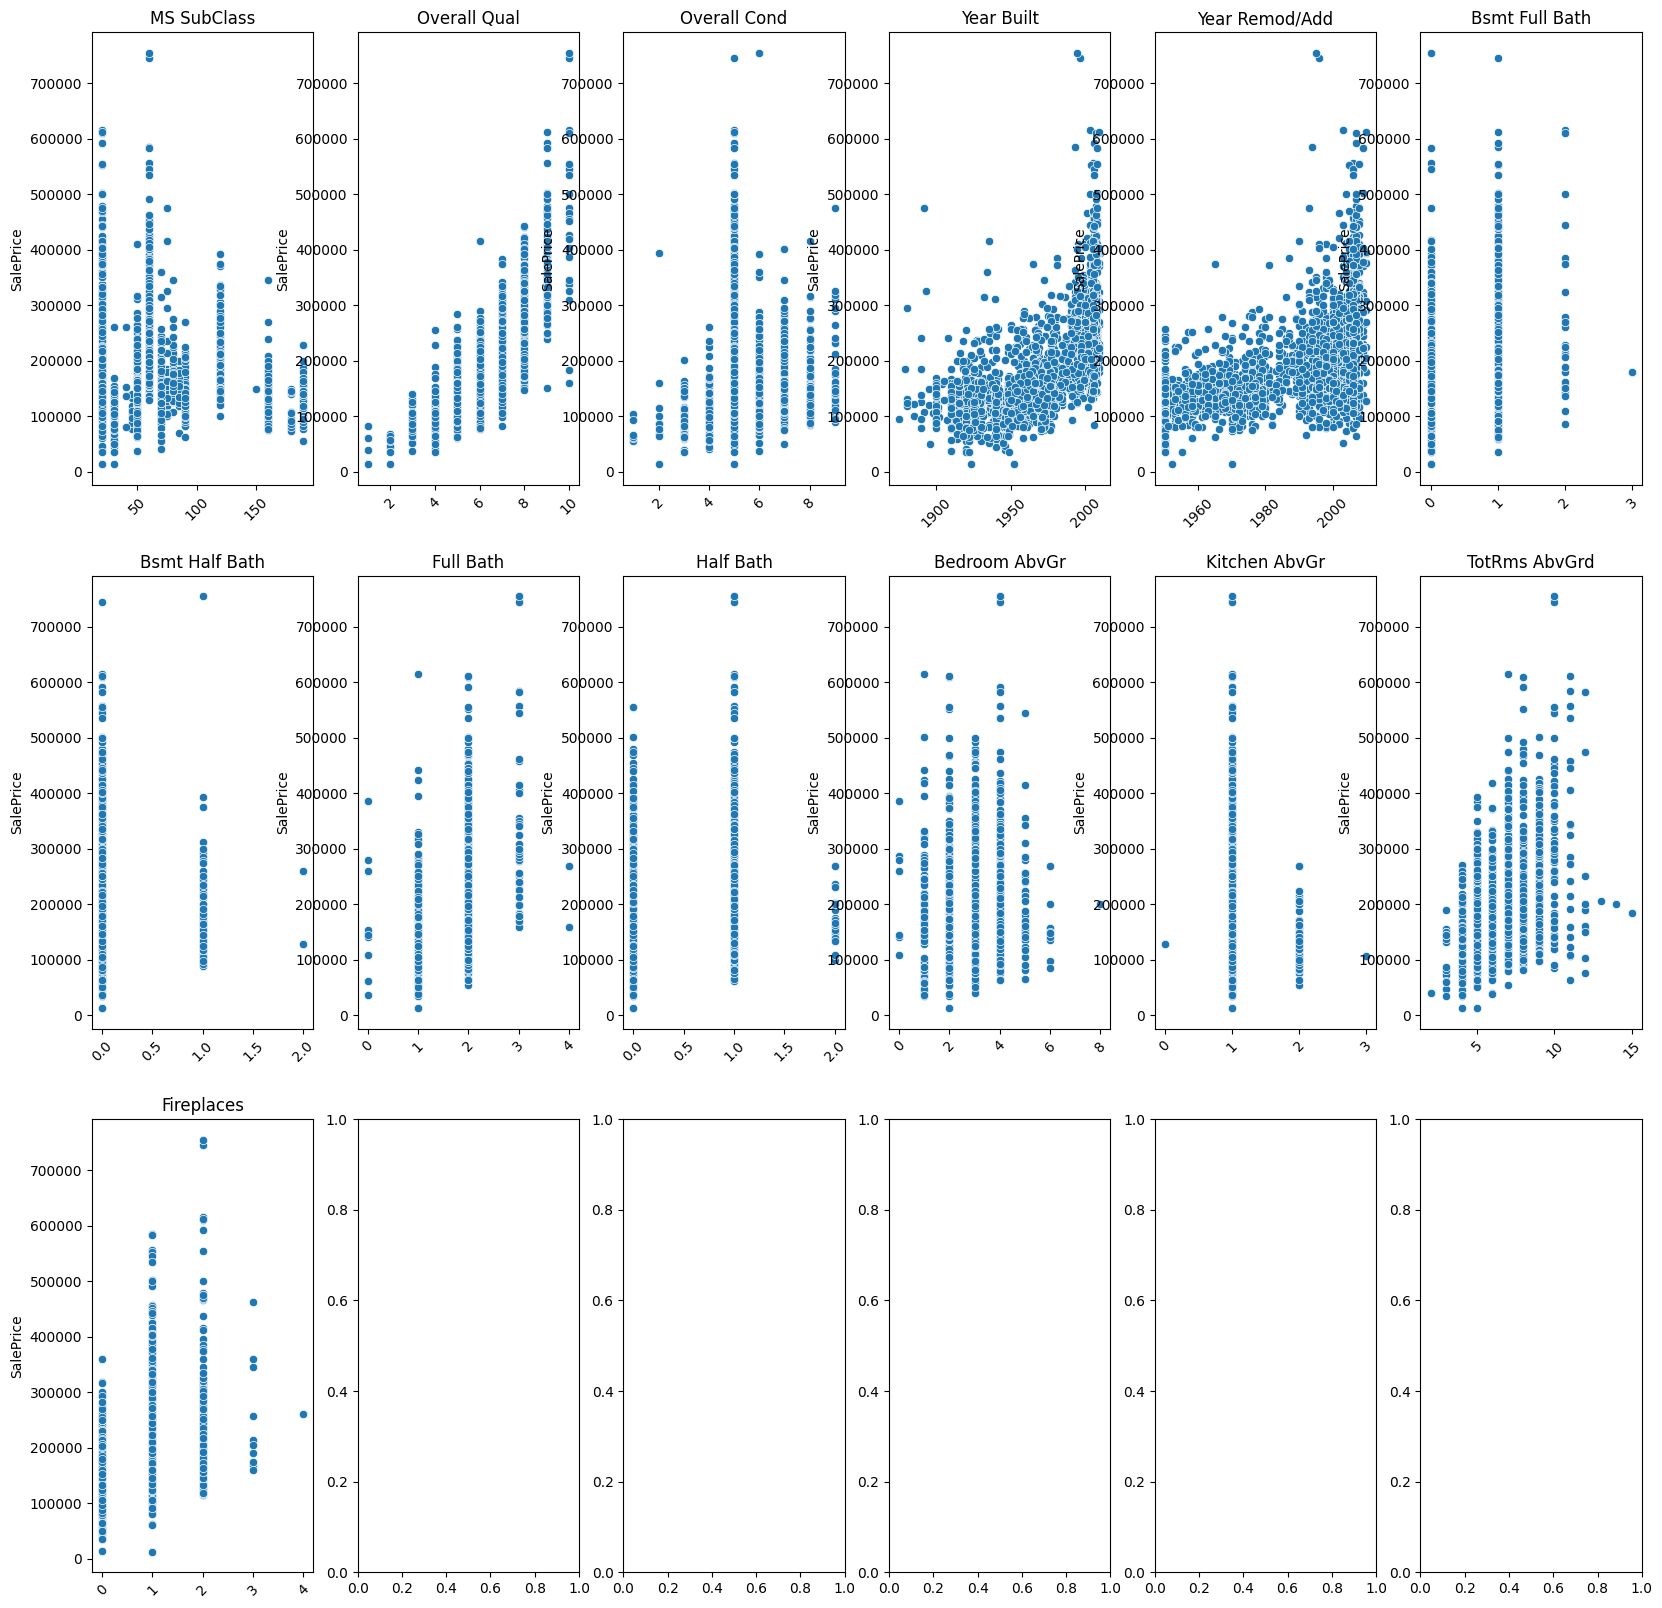

In [51]:
n_cols = 6
n_rows = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, col in enumerate(discrete_columns):
    r, c = np.divmod(i, n_cols)
    sns.scatterplot(x=col, y='SalePrice', data=df, ax=axs[r, c])
    #axs[r, c].set_yscale('log')
    axs[r, c].set_title(col, y=1.0)
    axs[r, c].set_xlabel('')
    for label in axs[r, c].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [ ]:
print(len(df.columns))
print(len(df[discrete_columns].columns))
print(len(df[continuous_columns].columns))
print(len(df[categorical_columns].columns))

In [ ]:
correlations = df[discrete_columns.tolist()+['SalePrice']].corr()['SalePrice'].abs().sort_values(ascending=False)
print(correlations)

## Numerical Contiuous Features

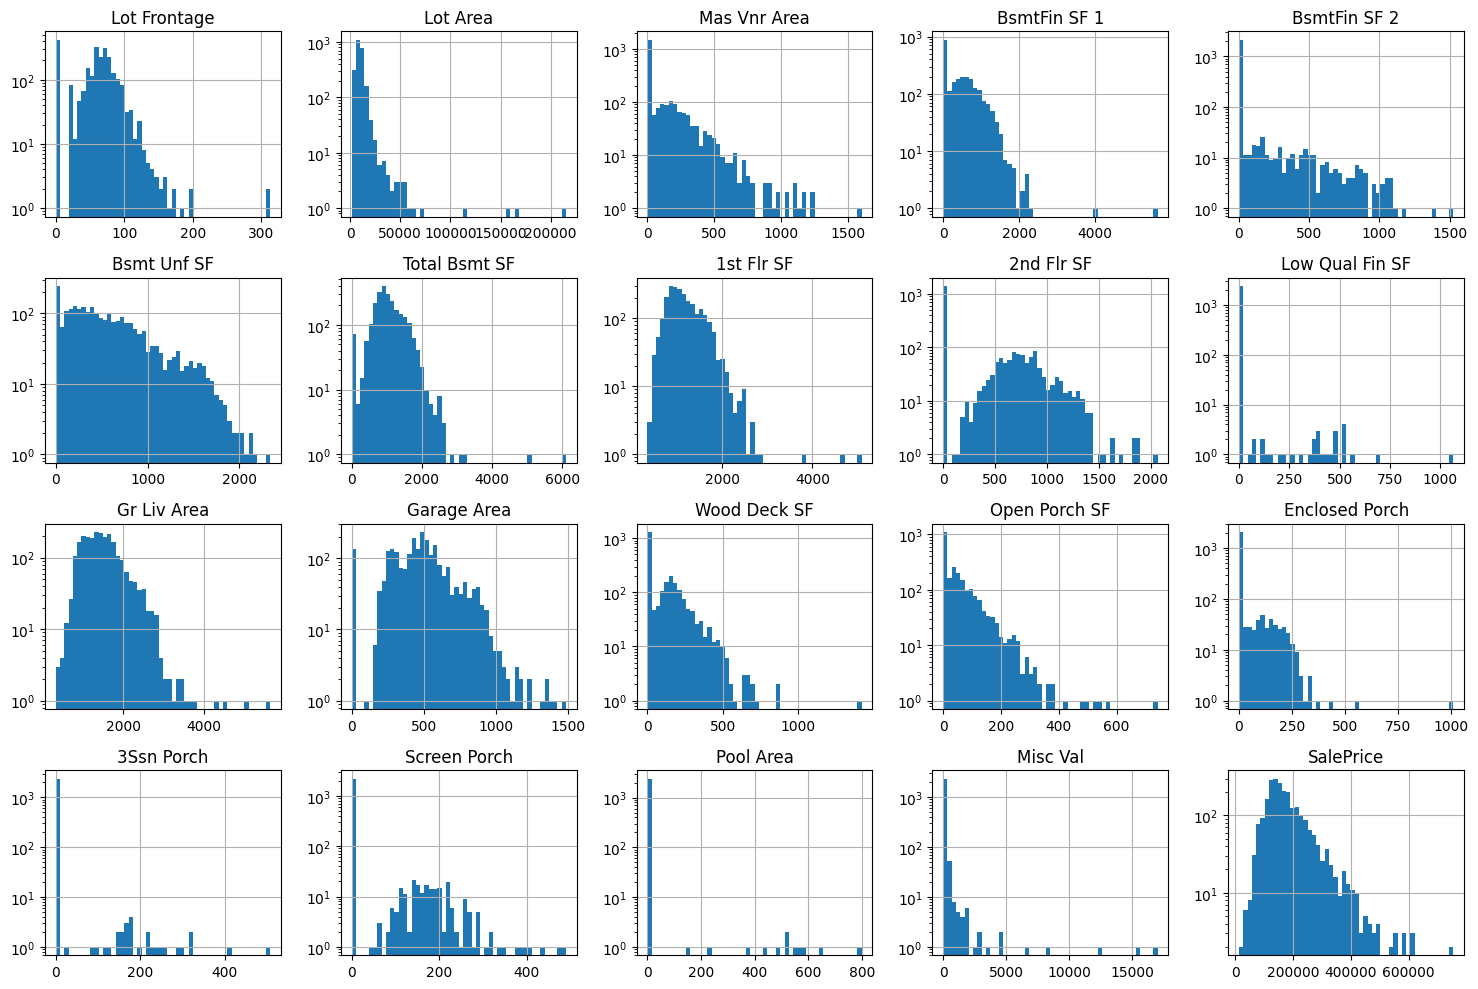

In [50]:

n_cols = 5
n_rows = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, col in enumerate(continuous_columns):
    r, c = np.divmod(i, n_cols)
    df[col].hist(bins=50, ax=axs[r, c], log=True)
    axs[r, c].set_title(col, y=1.0)
    axs[r, c].set_xlabel('')
    
plt.tight_layout()
plt.show()

# Enconding of Categorical Variables

__Observation__:
- Features such as 'Exter Cond', 'Exter Cond', 'Garage Finish', have an ordinal nature despite being part of the categorical variables
- We can use this fact to directly encode them into a single other numerical discrete variable

  
__Solution__:
- Encode the following categorical ordinal features: 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive'
- Assume a linear relationship between 'SalePrice' and all the categorical ordinal features (following observation of previous plots and information in documentation)
- Label encode these categorical variables into numerical discrete ones,  avoiding the creation of many new extra variables with "one-hot encoding"

In [ ]:
encoding_order={
    'Lot Shape':['Reg', 'IR1', 'IR2', 'IR3'], 
    'Utilities':['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
    'Land Slope':['Gtl', 'Mod', 'Sev'],
    'Overall Qual': ['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
    'Overall Cond': ['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
    'Exter Qual':['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Exter Cond':['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Bsmt Qual':['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Bsmt Cond':['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Bsmt Exposure':['Gd', 'Av', 'Mn', 'No', 'NA'], 
    'BsmtFin Type 1':['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
    'BsmtFin Type 2':['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
    'Heating QC':['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Electrical':['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
    'Kitchen Qual':['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Functional':['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
    'Fireplace Qu':['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Garage Finish':['Fin', 'RFn', 'Unf'],
    'Garage Qual':['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Garage Cond':['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Paved Drive':['Y', 'P', 'N'],
    'Pool QC': ['Ex', 'Gd', 'TA', 'Fa', 'NA'],
    'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'],
    }

In [ ]:
print("Missing values: ")
for col in encoding_order.keys():
    print(f'{col:20}: {df[col].isna().sum().sum()}')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder(categories=[['bad', 'average', 'good']])
df['col'] = ordinal_encoder.fit_transform(df[['col']])

# EDA and Data Cleaning

### Missing values
We start by observing the occurrence of missing values and next we see how to address these

In [ ]:
df.isnull().sum().sum()

In [ ]:
df_missing = df.isna().sum().to_frame(name='total')
df_missing = df_missing[df_missing['total']!=0].sort_values('total', ascending=False)
df_missing['percentage'] = df_missing['total']/len(df)*100
df_missing

In [ ]:
df.isnull().sum().sum()

In [ ]:
df_missing = df.isna().sum().to_frame(name='total')
df_missing = df_missing[df_missing['total']!=0].sort_values('total', ascending=False)
df_missing['percentage'] = df_missing['total']/len(df)*100
df_missing

Except for 'Electrical', all reamining columns with missing values are numerical. So let's handle 'Electrical' first. We chose the most common value to fill in the only missing entry.

In [ ]:
df['Electrical'].fillna(value=df['Electrical'].mode, inplace=True)

Reading the description of 'Lot Frontage' one sees that this is a continuous variable indicating 'Linear feet of street connected to property', it seems reasonable to assume if a house has no lot frontage then this could be set to 0.

In [ ]:
df['Lot Frontage'].hist(bins=50)
df['Lot Frontage'].fillna(0, inplace=True)

We apply the same principle to all other missing values, which at this point are present only in numerical columns.

In [ ]:
## CHECK!!
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum().sum()

### Inconsistencies

In [ ]:
sum(df['Year Remod/Add'] < df['Year Built'])

In [ ]:
(df['Bsmt Qual']=='None')!=(df['Bsmt Cond']=='None')

In [ ]:
sum((df['Bsmt Qual']=='None')+(df['Bsmt Cond']=='None'))

In [ ]:
print(sum(df['Bsmt Qual']=='None'))
print(sum(df['Bsmt Cond']=='None'))
print(sum(df['Bsmt Exposure']=='None'))
print(sum((df['Bsmt Qual']=='None') & (df['Bsmt Cond']=='None')))


In [ ]:
((df['Bsmt Qual']=='None')!=(df['Bsmt Cond']=='None')+(df['Bsmt Exposure']=='None'))

### Outliers

__Exploring the categorical variables__

In [ ]:
df_cat = df.loc[:,df.dtypes == 'object'].copy()
df_cat.nunique()

__Exploring the numerical variables__

In [ ]:
df.describe().loc[['min', 'max']].T

__Observation:__
- 'Garage Yr Blt': Minimum value is 0 and maximum is 2207 which clearly is an error since dataset only goes up to 2010

__Solution:__
- Remove entries where 'Garage Yr Blt' > 2010
- Remove entries where 'Garage Yr Blt' > 0

In [ ]:
mask = (df['Garage Yr Blt'] > 0) & (df['Garage Yr Blt'] < 2010)
df = df[mask]
df.shape

In [ ]:
df.hist(bins=20, figsize=(20,20), log=True)
plt.show()

In [ ]:
pd.set_option('display.float_format', '{:.5f}'.format)
corr_series = df[cols_per_hundred].corrwith(df['energy_per_hundred'])
corr_series.sort_values(ascending=False)